In [1]:
#update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Read CSV & Clean 

In [4]:
df = pd.read_csv("clean__filtered_loans.csv")
df.head()

,Unnamed: 0,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type,emp_length_int
0,4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual,3.0
1,5,11950.0,36 months,C,4 years,RENT,34000.0,Fully Paid,694.0,Individual,4.0
2,8,10000.0,36 months,A,6 years,RENT,85000.0,Fully Paid,689.0,Individual,6.0
3,10,22400.0,60 months,C,6 years,MORTGAGE,95000.0,Current,714.0,Individual,6.0
4,11,16000.0,60 months,C,1 year,MORTGAGE,70000.0,Current,724.0,Individual,1.0


In [5]:
df_clean = df.drop(['emp_length', 'Unnamed: 0', 'home_ownership'], axis=1)
df_clean.dropna(how='any')
df_clean = df_clean[(df_clean['loan_status'] == 'Fully Paid') | (df_clean['loan_status'] == 'Charged Off')]
df_clean

,loan_amnt,term,grade,annual_inc,loan_status,fico_range_high,application_type,emp_length_int
0,10400.0,60 months,F,104433.0,Fully Paid,699.0,Individual,3.0
1,11950.0,36 months,C,34000.0,Fully Paid,694.0,Individual,4.0
2,10000.0,36 months,A,85000.0,Fully Paid,689.0,Individual,6.0
5,1400.0,36 months,C,64000.0,Fully Paid,704.0,Individual,3.0
6,18000.0,60 months,E,150000.0,Charged Off,669.0,Individual,7.0
...,...,...,...,...,...,...,...,...
1512684,36400.0,60 months,C,95000.0,Charged Off,724.0,Individual,5.0
1512686,18000.0,60 months,B,130000.0,Fully Paid,739.0,Individual,5.0
1512688,29400.0,60 months,C,180792.0,Fully Paid,709.0,Individual,9.0
1512689,32000.0,60 months,C,157000.0,Charged Off,739.0,Individual,3.0


In [6]:
clean_1 = pd.get_dummies(df_clean, columns=["term","loan_status", "application_type",], drop_first=True)
clean_1

,loan_amnt,grade,annual_inc,fico_range_high,emp_length_int,term_ 60 months,loan_status_Fully Paid,application_type_Joint App
0,10400.0,F,104433.0,699.0,3.0,1,1,0
1,11950.0,C,34000.0,694.0,4.0,0,1,0
2,10000.0,A,85000.0,689.0,6.0,0,1,0
5,1400.0,C,64000.0,704.0,3.0,0,1,0
6,18000.0,E,150000.0,669.0,7.0,1,0,0
...,...,...,...,...,...,...,...,...
1512684,36400.0,C,95000.0,724.0,5.0,1,0,0
1512686,18000.0,B,130000.0,739.0,5.0,1,1,0
1512688,29400.0,C,180792.0,709.0,9.0,1,1,0
1512689,32000.0,C,157000.0,739.0,3.0,1,0,0


In [7]:
print(clean_1.dtypes)

loan_amnt                     float64
grade                          object
annual_inc                    float64
fico_range_high               float64
emp_length_int                float64
term_ 60 months                 uint8
loan_status_Fully Paid          uint8
application_type_Joint App      uint8
dtype: object


In [8]:
clean_1 = clean_1.replace({'grade': {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'F': 1, 'G': 0}})
clean_1 = clean_1.dropna()
clean_1

,loan_amnt,grade,annual_inc,fico_range_high,emp_length_int,term_ 60 months,loan_status_Fully Paid,application_type_Joint App
0,10400.0,1,104433.0,699.0,3.0,1,1,0
1,11950.0,4,34000.0,694.0,4.0,0,1,0
2,10000.0,6,85000.0,689.0,6.0,0,1,0
5,1400.0,4,64000.0,704.0,3.0,0,1,0
6,18000.0,2,150000.0,669.0,7.0,1,0,0
...,...,...,...,...,...,...,...,...
1512684,36400.0,4,95000.0,724.0,5.0,1,0,0
1512686,18000.0,5,130000.0,739.0,5.0,1,1,0
1512688,29400.0,4,180792.0,709.0,9.0,1,1,0
1512689,32000.0,4,157000.0,739.0,3.0,1,0,0


# Select Features

In [14]:
# Set features. This will also be used as your x values.
selected_features = clean_1.drop(['grade'], axis=1)

# Create Train Test Split 

In [15]:
# set X and y variables
x = selected_features # Features
y = clean_1['grade'] # Target variable
print(x.shape, y.shape)

(824600, 7) (824600,)


In [16]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [17]:
x_train.head()

,loan_amnt,annual_inc,fico_range_high,emp_length_int,term_ 60 months,loan_status_Fully Paid,application_type_Joint App
614635,7000.0,42264.0,699.0,1.0,0,1,0
1169108,11000.0,104000.0,664.0,1.0,0,1,0
202356,16000.0,60000.0,694.0,4.0,1,0,0
244712,20000.0,96000.0,694.0,0.0,0,1,0
38530,13075.0,150000.0,679.0,3.0,0,1,0


# Pre-Processing & One Hot 

In [18]:
# Scale your data
x_scaler = MinMaxScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Model Training

k: 1, Train/Test Score: 0.879/0.334
k: 3, Train/Test Score: 0.607/0.325
k: 5, Train/Test Score: 0.557/0.363
k: 7, Train/Test Score: 0.529/0.374
k: 9, Train/Test Score: 0.511/0.383
k: 11, Train/Test Score: 0.499/0.387
k: 13, Train/Test Score: 0.490/0.392
k: 15, Train/Test Score: 0.482/0.395
k: 17, Train/Test Score: 0.477/0.398
k: 19, Train/Test Score: 0.472/0.400


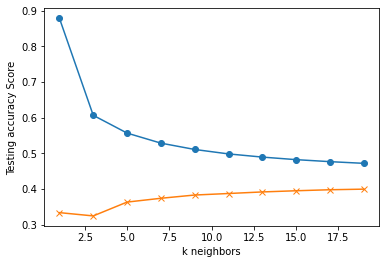

In [19]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    test_score = knn.score(x_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train_scaled, y_train)
predictions = knn.predict(x_test_scaled)

print(f"Training Data Score: {knn.score(x_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(x_test_scaled, y_test)}")

Training Data Score: 0.4721141563586385
Testing Data Score: 0.3997138006306088


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, 
                            target_names = ["6", "5", "4", "3", "2", "1", "0"]))

              precision    recall  f1-score   support

           6       0.07      0.00      0.00      1403
           5       0.18      0.04      0.07      4909
           4       0.27      0.16      0.20     14421
           3       0.27      0.17      0.21     31041
           2       0.37      0.46      0.41     58602
           1       0.40      0.47      0.44     59985
           0       0.59      0.54      0.56     35789

    accuracy                           0.40    206150
   macro avg       0.31      0.26      0.27    206150
weighted avg       0.39      0.40      0.39    206150



# Save the Model

In [22]:
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']